# Working with CPI and Salary data

In [18]:
import pandas as pd
import matplotlib as plt
import numpy as np
import bls

In [19]:
wages = bls.get_series("CIU2020000000000A")
wages

date
2012Q1    1.9
2012Q2    1.8
2012Q3    1.8
2012Q4    1.7
2013Q1    1.7
2013Q2    1.9
2013Q3    1.8
2013Q4    2.1
2014Q1    1.7
2014Q2    1.9
2014Q3    2.3
2014Q4    2.2
2015Q1    2.8
2015Q2    2.2
2015Q3    2.1
2015Q4    2.1
2016Q1    2.0
2016Q2    2.6
2016Q3    2.4
2016Q4    2.3
2017Q1    2.6
2017Q2    2.4
2017Q3    2.6
2017Q4    2.8
2018Q1    2.9
2018Q2    2.9
2018Q3    3.1
2018Q4    3.1
2019Q1    3.0
2019Q2    3.0
2019Q3    3.0
2019Q4    3.0
2020Q1    3.3
2020Q2    2.9
2020Q3    2.7
2020Q4    2.8
2021Q1    3.0
2021Q2    3.5
Freq: Q-DEC, Name: CIU2020000000000A, dtype: float64

## Assessing our two data series
Pull the CPI dat series as the variable, cpi. Export the data to a CSV file names cpi_data.csv. 
Then read the csv into a dataframe called *cpi_data* and do a bit of formatting by addding two column headers (Date and CPI)

In [20]:
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv("cpi_data.csv")
cpi_data = pd.read_csv("cpi_data.csv")
cpi_data.columns = "Date", "CPI"

In [21]:
cpi_data

,Date,CPI
0,2012-01,226.665
1,2012-02,227.663
2,2012-03,229.392
3,2012-04,230.085
4,2012-05,229.815
...,...,...
110,2021-03,264.877
111,2021-04,267.054
112,2021-05,269.195
113,2021-06,271.696


## Manipulating the CPI data series

In [22]:
cpi_data["Date"] = cpi_data["Date"].str.replace("-03", "Q1")
cpi_data["Date"] = cpi_data["Date"].str.replace("-06", "Q2")
cpi_data["Date"] = cpi_data["Date"].str.replace("-09", "Q3")
cpi_data["Date"] = cpi_data["Date"].str.replace("-12", "Q4")



In [23]:
cpi_data["Date"]

0      2012-01
1      2012-02
2       2012Q1
3      2012-04
4      2012-05
        ...   
110     2021Q1
111    2021-04
112    2021-05
113     2021Q2
114    2021-07
Name: Date, Length: 115, dtype: object

In [24]:
newcpi_data = cpi_data[(cpi_data.Date.str.contains("-") == False)]

In [25]:
newcpi_data

,Date,CPI
2,2012Q1,229.392
5,2012Q2,229.478
8,2012Q3,231.407
11,2012Q4,229.601
14,2013Q1,232.773
17,2013Q2,233.504
20,2013Q3,234.149
23,2013Q4,233.049
26,2014Q1,236.293
29,2014Q2,238.343


In [26]:
newcpi_data.to_csv("cpi-clean.csv")

## Converting percentages to "CPI" values

1. First, we get the data.
2. Save the data a CSV file.
3. Push the saved file to dataframe called df.
4. Give it columns headers.

In [28]:
wages = bls.get_series("CIU2020000000000A")
wages.to_csv("bls_wages_data_csv")
df = pd.read_csv("bls_wages_data_csv")
df.columns =  "Date", "Wages"

In [29]:
df.head()

,Date,Wages
0,2012Q1,1.9
1,2012Q2,1.8
2,2012Q3,1.8
3,2012Q4,1.7
4,2013Q1,1.7


In [30]:
newdf = df

In [33]:
newnum = 229.392
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x/400) * newnum + newnum
        return newnum
    else:
        return
newwages_data = newdf.applymap(process_wages)
newwages_data

,Date,Wages
0,2012Q1,230.481612
1,2012Q2,231.518779
2,2012Q3,232.560614
3,2012Q4,233.548996
4,2013Q1,234.541580
5,2013Q2,235.655652
6,2013Q3,236.716103
7,2013Q4,237.958862
8,2014Q1,238.970187
9,2014Q2,240.105296


# Merge and plot our dataframes

In [34]:
merged_data = pd.merge(newcpi_data, newwages_data, on="Date")

In [35]:
merged_data

,Date,CPI,Wages
0,2012Q1,229.392,230.481612
1,2012Q2,229.478,231.518779
2,2012Q3,231.407,232.560614
3,2012Q4,229.601,233.548996
4,2013Q1,232.773,234.541580
5,2013Q2,233.504,235.655652
6,2013Q3,234.149,236.716103
7,2013Q4,233.049,237.958862
8,2014Q1,236.293,238.970187
9,2014Q2,238.343,240.105296


## Create a bar chart.
 Because there's an awful lot of data, we'll extend the size of the chart with a manual figsize

Text(0.5, 0, 'Dates')

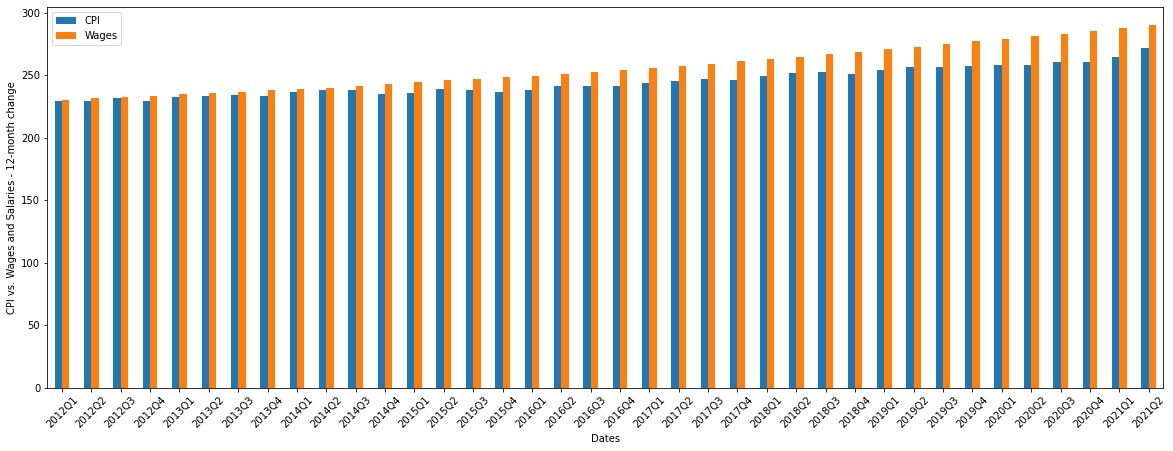

In [41]:
ax = merged_data.plot(kind="bar", figsize=(20,7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel("CPI vs. Wages and Salaries - 12-month change")
ax.set_xlabel("Dates")

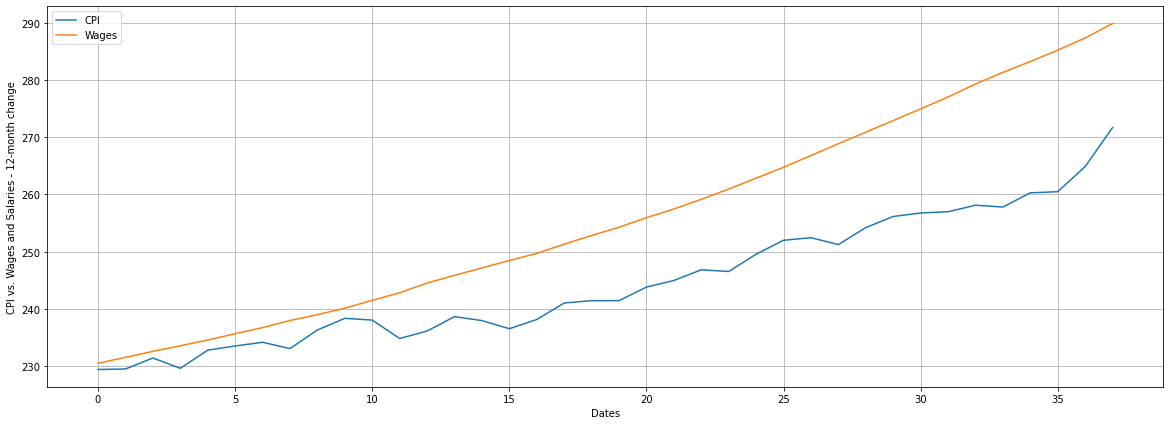

In [42]:
ax = merged_data.plot(kind="line", figsize=(20,7))
ax.set_ylabel("CPI vs. Wages and Salaries - 12-month change")
ax.set_xlabel("Dates")
ax.grid()